In [1]:
#Constructing word clouds for raw reviews and extracted reviews for comparison
from pathlib import Path
import pandas as pd
from nltk.corpus import stopwords, reuters
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import re
import matplotlib.pyplot as plt


In [2]:
# read in cleaned CSV
filepath = Path('massive.csv')
massive = pd.read_csv(filepath)
massive = massive.sample(n=1000)

In [3]:
lemmatizer = WordNetLemmatizer()

In [4]:
# add frequently used movie-related words to stopwords 
# custom_stop_words = ['movie', 'film', 'story', 'character', 'make']
# [stopwords.add(n) for n in custom_stop_words] 

sw_addon = {'movie', 'film', 'story', 'character', 'make', 'one', 'even', 'ha'} 
sw = set(stopwords.words('english'))
sw = sw.union(sw_addon)

In [5]:
def process_text(doc):
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return ' '.join(output)

In [6]:
# Process text for wordcloud creation
big_string = ' '.join(massive['reviewText'])
input_text = process_text(big_string)

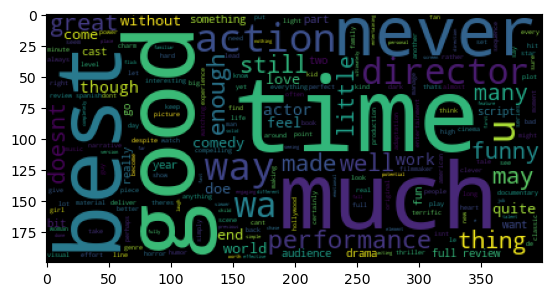

In [13]:
wc = WordCloud().generate(input_text)
plt.imshow(wc)
#plt.set_title('WordCloud of all reviews')
plt.savefig('output_plots/WordCloud_inputdata')


In [9]:
?WordCloud

Init signature:
WordCloud(
    font_path=None,
    width=400,
    height=200,
    margin=2,
    ranks_only=None,
    prefer_horizontal=0.9,
    mask=None,
    scale=1,
    color_func=None,
    max_words=200,
    min_font_size=4,
    stopwords=None,
    random_state=None,
    background_color='black',
    max_font_size=None,
    font_step=1,
    mode='RGB',
    relative_scaling='auto',
    regexp=None,
    collocations=True,
    colormap=None,
    normalize_plurals=True,
    contour_width=0,
    contour_color='black',
    repeat=False,
    include_numbers=False,
    min_word_length=0,
    collocation_threshold=30,
)
Docstring:     
Word cloud object for generating and drawing.

Parameters
----------
font_path : string
    Font path to the font that will be used (OTF or TTF).
    Defaults to DroidSansMono path on a Linux machine. If you are on
    another OS or don't have this font, you need to adjust this path.

width : int (default=400)
    Width of the canvas.

height : int (default=2